# IA340 Mini Project — Electric Vehicle Population 
**Student:** Sydney Schunk
**Course:** IA 340  
**Dataset:** Electric_Vehicle_Population_Data.csv  
**Research question:** How have electric vehicle registrations (counts) changed over recent model years, and which states (top 10) account for the largest share of registered EVs in this dataset?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "s3://electrical-vehicle-data/Electric_Vehicle_Population_Data.csv"

df = pd.read_csv(csv_path)


print(f"Loaded {df.shape[0]:,} rows and {df.shape[1]:,} columns from {csv_path}")
df.head(8)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


Loaded 264,628 rows and 17 columns from s3://electrical-vehicle-data/Electric_Vehicle_Population_Data.csv


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,22.0,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,0.0,15.0,318160860,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204.0,0.0,11.0,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,KNDJP3AEXG,Snohomish,Lynnwood,WA,98037.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,21.0,209171889,POINT (-122.27734 47.83785),PUGET SOUND ENERGY INC,5.306105e+10
6,1N4AZ1CP7K,Snohomish,Edmonds,WA,98026.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,32.0,478448624,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10
7,KNDCC3LG4L,Snohomish,Brier,WA,98036.0,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,1.0,281365724,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10


## Dataset documentation
- **Source:** local file uploaded by me (Electric_Vehicle_Population_Data.csv).  
- **Brief description:** vehicle registration records; includes VIN (partial), location fields (City, County, State), Model Year, Electric Range, Base MSRP and other attributes.   
- **Why chosen:** EV adoption is an interesting social/technology trend and the data lets us analyze counts by year/state and compare ranges/prices.


In [2]:

print("Shape:", df.shape)
print("\nColumns:")
print(list(df.columns))


display(df.info())
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(20))


display(df.describe(include='number').transpose())


Shape: (264628, 17)

Columns:
['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264628 entries, 0 to 264627
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         264628 non-null  object 
 1   County                                             264619 non-null  object 
 2   City                                               264619 non-null  object 
 3   State                                              264628 non-null  object 
 4   Postal Code                                        264619 non-null  

None


Missing values per column:
 Legislative District                                 659
Vehicle Location                                      17
2020 Census Tract                                      9
County                                                 9
City                                                   9
Postal Code                                            9
Electric Utility                                       9
Base MSRP                                              4
Electric Range                                         4
VIN (1-10)                                             0
Electric Vehicle Type                                  0
Make                                                   0
Model Year                                             0
State                                                  0
Model                                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
DOL Vehicle ID                                         0
dt

,count,mean,std,min,25%,50%,75%,max
Postal Code,264619.0,9.817077e+04,2.637718e+03,1.469000e+03,9.805200e+04,9.813300e+04,9.838200e+04,9.957700e+04
Model Year,264628.0,2.021843e+03,3.044095e+00,1.999000e+03,2.021000e+03,2.023000e+03,2.024000e+03,2.026000e+03
Electric Range,264624.0,4.171316e+01,8.037798e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,3.370000e+02
Base MSRP,264624.0,6.789022e+02,6.868920e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,263969.0,2.886290e+01,1.488336e+01,1.000000e+00,1.700000e+01,3.200000e+01,4.200000e+01,4.900000e+01
DOL Vehicle ID,264628.0,2.422540e+08,6.516028e+07,4.385000e+03,2.174474e+08,2.603598e+08,2.758921e+08,4.791150e+08
2020 Census Tract,264619.0,5.297109e+10,1.638317e+09,1.001020e+09,5.303301e+10,5.303303e+10,5.305307e+10,6.601095e+10


## Cleaning steps 
1. Rename long column `VIN (1-10)` to `VIN` for convenience.  
2. Convert data types if necessary (e.g., Model Year → int).  
3. Handle missing values for key columns: for this project we will drop rows missing `State` or `Model Year`, because we need them for our main analyses (counts by state and year). We'll impute or leave other missing numeric fields (e.g., `Electric Range`) as-is but note counts of missing values.  
4. Remove duplicates on `VIN` if they exist (keep first).  
5. Create any derived fields needed (e.g., `model_year` as int).


In [3]:

if 'VIN (1-10)' in df.columns:
    df = df.rename(columns={'VIN (1-10)': 'VIN'})


if 'Model Year' in df.columns:
    df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce').astype('Int64')


keep_cols = ['State', 'Model Year']
missing_before = df[keep_cols].isnull().any(axis=1).sum()
print(f"Rows with missing State or Model Year before drop: {missing_before:,}")
df = df.dropna(subset=keep_cols)


if 'VIN' in df.columns:
    dup_count = df['VIN'].duplicated().sum()
    print(f"Duplicate VIN rows: {dup_count:,}")
    df = df.drop_duplicates(subset=['VIN'])

print("After cleaning shape:", df.shape)


Rows with missing State or Model Year before drop: 0
Duplicate VIN rows: 248,656
After cleaning shape: (15972, 17)


In [4]:

print("Top 10 states by record count:")
display(df['State'].value_counts().head(10))


display(df.sort_values('Model Year', ascending=False).head(8))


display(df.iloc[100:110])


Top 10 states by record count:


State
WA    15944
CA        5
CO        5
MD        2
AZ        2
VA        2
MA        2
WI        1
ID        1
AE        1
Name: count, dtype: int64

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
147348,1GT1ETED6T,Snohomish,Everett,WA,98203.0,2026,GMC,SIERRA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,38.0,284928052,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,5.306104e+10
7849,WBS83GV02T,Pierce,Lakewood,WA,98499.0,2026,BMW,M5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,24.0,0.0,28.0,285104375,POINT (-122.51495 47.16196),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
70818,1GYC3KML9T,Snohomish,Stanwood,WA,98292.0,2026,CADILLAC,VISTIQ,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,282881770,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
173994,7SAXCAE55T,Snohomish,Edmonds,WA,98026.0,2026,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,21.0,284043406,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306104e+10
95166,4JGGM1CB4T,Whatcom,Ferndale,WA,98248.0,2026,MERCEDES-BENZ,EQE-CLASS SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,42.0,286125801,POINT (-122.5945 48.84787),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
70688,YV4H60JF2T,Pierce,Tacoma,WA,98422.0,2026,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,27.0,286209297,POINT (-122.39471 47.28159),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
70723,5XYAEFS52T,Snohomish,Marysville,WA,98270.0,2026,KIA,EV9,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,284121078,POINT (-122.1769 48.06114),PUGET SOUND ENERGY INC,5.306105e+10
166499,7PDSGABP7T,King,Seattle,WA,98115.0,2026,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,285085419,POINT (-122.31676 47.68156),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303300e+10


,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
103,WA1E2AFY9P,Snohomish,Tulalip,WA,98271.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,38.0,232919305,POINT (-122.1677 48.11026),PUGET SOUND ENERGY INC,5.306194e+10
104,JTMEB3FV3R,Thurston,Olympia,WA,98506.0,2024,TOYOTA,RAV4 PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,22.0,260677511,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
105,1V25MPE86R,Thurston,Lacey,WA,98503.0,2024,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,22.0,277263192,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
106,1N4AZ1CP3J,Kitsap,Suquamish,WA,98392.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,23.0,218882212,POINT (-122.55242 47.73162),PUGET SOUND ENERGY INC,5.303594e+10
107,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,14.0,219969144,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
108,JTJHKCFZ6N,Island,Oak Harbor,WA,98277.0,2022,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,10.0,207405397,POINT (-122.64682 48.29077),PUGET SOUND ENERGY INC,5.302997e+10
109,5YJ3E1EB1J,King,Seattle,WA,98107.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,36.0,183328967,POINT (-122.38591 47.67597),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
110,1FADP5CU8D,Thurston,Tumwater,WA,98501.0,2013,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,161059524,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
111,1N4AZ1CP1J,King,Seattle,WA,98133.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,46.0,238473847,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
113,1N4AZ0CP8D,King,Redmond,WA,98052.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,48.0,102666784,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


**Manipulation explanation:**  
- Selected `State` to inspect how records distribute by state.  
- Sorted by `Model Year` to see newest registrations.  
- Provided a small row slice example to confirm the table looks correct.


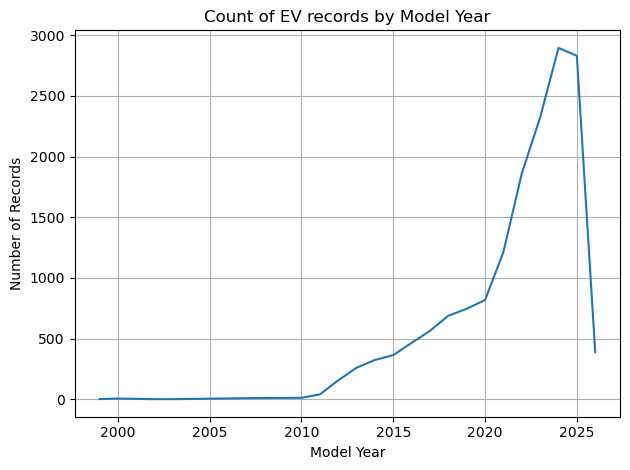

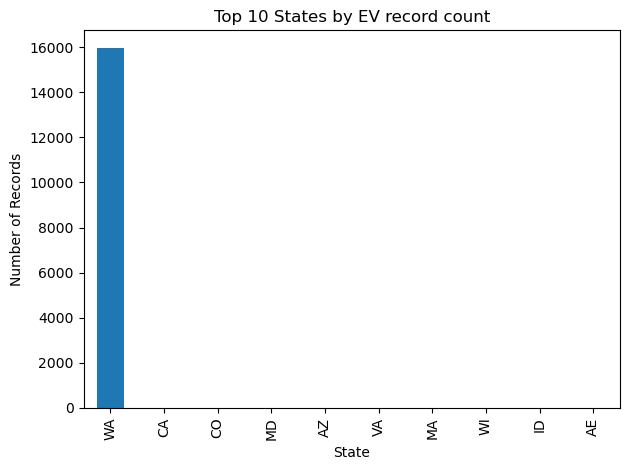

In [10]:
import os
import matplotlib.pyplot as plt

# 1) Time series: number of registrations by Model Year
ts = df.groupby('Model Year').size().sort_index()
plt.figure()
ts.plot()
plt.title("Count of EV records by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Records")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Top 10 states by record count (bar chart)
top_states = df['State'].value_counts().head(10)
plt.figure()
top_states.plot(kind='bar')
plt.title("Top 10 States by EV record count")
plt.xlabel("State")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()


**Plot 1: Count of EV records by Model Year**  
This line chart shows how many EV records in the dataset belong to each model year. It helps evaluate trends across model years. The graph shows a high increase in EV records from the year 2020 to around 2024, then a small decrease from 2024 to 2025,and now through the year of 2025 there has been a drastic decrease. 

**Plot 2: Top 10 States by EV record count**  
This bar chart highlights which states contribute the most EV registrations in the dataset. The dataset clearly shows that the 
